In [3]:
!pip install numpy
!pip install h5py
!pip install pandas 
!pip install matplotlib
!pip install torch
!pip install torchvision
!pip install pytorch_lightning

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached h5py-3.1.0-cp36-cp36m-manylinux1_x86_64.whl (4.0 MB)
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl (9.5 MB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
  Using cached Pillow-8.4.0-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-1.10.2-cp36-cp36m-many

In [2]:
import os
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import sys

sys.path.insert(0,'/eagle/MDClimSim/mjp5595/ClimaX-v2/src/')
from climax.global_forecast.iterative_datamodule import IterativeDataModule

/home/mjp5595/.local/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# from the initial var_4d.py:
filepath = "/eagle/MDClimSim/awikner/irga_1415_test1_obs.hdf5" # Observations
background_err_file_old = '/eagle/MDClimSim/awikner/background_err_sh_coeffs_var.npy' #B (spherical harmonics)
background_err_file = '/eagle/MDClimSim/troyarcomano/ml4dvar_climax_v2/background_24hr_diff_hf_var_climaxv2_standardized_128_uv.npy'
background_err_hf_file_old = '/eagle/MDClimSim/awikner/background_err_hf_var.npy' # B_hf (high_frequency) - ignored
background_err_hf_file = '/eagle/MDClimSim/troyarcomano/ml4dvar_climax_v2/background_24hr_diff_sh_coeffs_var_climaxv2_standardized_128_uv.npy' # B_hf (high_frequency) - ignored
background_file = '/eagle/MDClimSim/troyarcomano/ClimaX/predictions_test/forecasts.hdf5' # 6 hour forcasts (grid space)
dv_param_file = '/eagle/MDClimSim/awikner/dv_params_128_256.hdf5'
background_file_np = '/eagle/MDClimSim/troyarcomano/ml4dvar_climax_v2/background_24hr_diff_hf_var_climaxv2_standardized_128_uv.npy' # 6 hour forcasts (grid space)

In [13]:
fp = h5py.File(filepath,'r')
bef_old = np.load(background_err_file_old)
bef = np.load(background_err_file)
behf_old = np.load(background_err_hf_file_old)
behf = np.load(background_err_hf_file)
bf = h5py.File(background_file,'r')
dvpf = h5py.File(dv_param_file,'r')

In [17]:
background_err_file = '/eagle/MDClimSim/troyarcomano/ml4dvar_climax_v2/background_24hr_diff_sh_coeffs_var_climaxv2_standardized_128_uv.npy' # B_hf (high_frequency) - ignored
background_err_hf_file = '/eagle/MDClimSim/troyarcomano/ml4dvar_climax_v2/background_24hr_diff_hf_var_climaxv2_standardized_128_uv.npy'

bef = np.load(background_err_file)
behf = np.load(background_err_hf_file)

#print('background_err_file (old) :',bef_old.shape)
print('background_err_file :',bef.shape)
#print('background_err_hf_file (old):',behf_old.shape)
print('background_err_hf_file :',behf.shape)

background_err_file (old) : (27, 128)
background_err_file : (82, 128)
background_err_hf_file (old): (27, 128, 256)
background_err_hf_file : (82, 128, 256)


In [19]:
bf['truth_12hr'][0].shape

(27, 128, 256)

In [16]:
background = torch.unsqueeze(torch.from_numpy(bf['truth_12hr'][0]), 0)
background.shape

torch.Size([1, 27, 128, 256])

In [5]:
#for k in fp.keys():
#    print('fp[{}].shape: {}'.format(k,fp[k].shape)) # (timesteps,nvars,128,256)
print('bef.shape:',bef.shape) # (nvars,128)
print('behf.shape:',behf.shape) # (nvars,128,256)
for k in bf.keys():
    print('bf[{}].shape: {}'.format(k,bf[k].shape)) # (timesteps,nvars,128,256)
for k in dvpf.keys():
    print('dvpf[{}].shape: {}'.format(k,dvpf[k].shape))

bef.shape: (27, 128)
behf.shape: (27, 128, 256)
bf[pred_12hr].shape: (10320, 27, 128, 256)
bf[truth_12hr].shape: (10320, 27, 128, 256)
dvpf[delta_x].shape: (255,)
dvpf[delta_y].shape: (127,)
dvpf[dx_correction].shape: (128, 256)
dvpf[dy_correction].shape: (128, 256)
dvpf[meridional_scale].shape: (128, 256)
dvpf[parallel_scale].shape: (128, 256)


In [6]:
means = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_mean.npz')
stds = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_std.npz')
d6_stds = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_diff_std_6.npz')
d12_stds = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_diff_std_12.npz')

In [7]:
#for m in means.files:
#    print('means[{}].shape: {}'.format(m,means[m].shape))
print('means.files() :',means.files)
print('len(means.files) :',len(means.files))
print('len(stds.files) :',len(stds.files))
print('len(d6_stds.files) :',len(d6_stds.files))
print('len(d12_stds.files) :',len(d12_stds.files))

means.files() : ['angle_of_sub_gridscale_orography', 'geopotential_at_surface', 'high_vegetation_cover', 'lake_cover', 'lake_depth', 'land_sea_mask', 'low_vegetation_cover', 'slope_of_sub_gridscale_orography', 'soil_type', 'standard_deviation_of_filtered_subgrid_orography', 'standard_deviation_of_orography', 'type_of_high_vegetation', 'type_of_low_vegetation', '2m_temperature', '10m_u_component_of_wind', '10m_v_component_of_wind', '10m_wind_speed', 'mean_sea_level_pressure', 'geopotential_50', 'geopotential_100', 'geopotential_150', 'geopotential_200', 'geopotential_250', 'geopotential_300', 'geopotential_400', 'geopotential_500', 'geopotential_600', 'geopotential_700', 'geopotential_850', 'geopotential_925', 'geopotential_1000', 'specific_humidity_50', 'specific_humidity_100', 'specific_humidity_150', 'specific_humidity_200', 'specific_humidity_250', 'specific_humidity_300', 'specific_humidity_400', 'specific_humidity_500', 'specific_humidity_600', 'specific_humidity_700', 'specific_h

In [8]:
datamodule = OneStepDataModule(
    '/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df',
    variables=[
    "2m_temperature",
    "10m_u_component_of_wind",
    "10m_v_component_of_wind",
    "mean_sea_level_pressure",
    "geopotential_50",
    "geopotential_100",
    "geopotential_150",
    "geopotential_200",
    "geopotential_250",
    "geopotential_300",
    "geopotential_400",
    "geopotential_500",
    "geopotential_600",
    "geopotential_700",
    "geopotential_850",
    "geopotential_925",
    "geopotential_1000",
    "u_component_of_wind_50",
    "u_component_of_wind_100",
    "u_component_of_wind_150",
    "u_component_of_wind_200",
    "u_component_of_wind_250",
    "u_component_of_wind_300",
    "u_component_of_wind_400",
    "u_component_of_wind_500",
    "u_component_of_wind_600",
    "u_component_of_wind_700",
    "u_component_of_wind_850",
    "u_component_of_wind_925",
    "u_component_of_wind_1000",
    "v_component_of_wind_50",
    "v_component_of_wind_100",
    "v_component_of_wind_150",
    "v_component_of_wind_200",
    "v_component_of_wind_250",
    "v_component_of_wind_300",
    "v_component_of_wind_400",
    "v_component_of_wind_500",
    "v_component_of_wind_600",
    "v_component_of_wind_700",
    "v_component_of_wind_850",
    "v_component_of_wind_925",
    "v_component_of_wind_1000",
    "vertical_velocity_50",
    "vertical_velocity_100",
    "vertical_velocity_150",
    "vertical_velocity_200",
    "vertical_velocity_250",
    "vertical_velocity_300",
    "vertical_velocity_400",
    "vertical_velocity_500",
    "vertical_velocity_600",
    "vertical_velocity_700",
    "vertical_velocity_850",
    "vertical_velocity_925",
    "vertical_velocity_1000", # unmeasurable
    "temperature_50",
    "temperature_100",
    "temperature_150",
    "temperature_200",
    "temperature_250",
    "temperature_300",
    "temperature_400",
    "temperature_500",
    "temperature_600",
    "temperature_700",
    "temperature_850",
    "temperature_925",
    "temperature_1000",
    "specific_humidity_50",
    "specific_humidity_100",
    "specific_humidity_150",
    "specific_humidity_200",
    "specific_humidity_250",
    "specific_humidity_300",
    "specific_humidity_400",
    "specific_humidity_500",
    "specific_humidity_600",
    "specific_humidity_700",
    "specific_humidity_850",
    "specific_humidity_925",
    "specific_humidity_1000",
    ],
    val_lead_times=[6,72,120],
    batch_size=128,
    num_workers=1,
    pin_memory=False
)
datamodule.setup()
print('data_module setup')
for batch in datamodule.train_dataloader():
    # norm, raw, norm_diff, var_in, var_out
    inp_norm, inp_raw, diff_norm, vars_in, vars_out = batch
    print ('inp_norm :',inp_norm.shape)
    print ('inp_raw :',inp_raw.shape)
    print ('diff_norm :',diff_norm.shape)
    print ('vars_in :',vars_in)
    print ('vars_out :',vars_out)
    break

data_module initiated
data_module setup
torch.Size([128, 1, 82, 128, 256])
torch.Size([128, 1, 82, 128, 256])
torch.Size([128, 82, 128, 256])
['2m_temperature', '10m_u_component_of_wind', '10m_v_component_of_wind', 'mean_sea_level_pressure', 'geopotential_50', 'geopotential_100', 'geopotential_150', 'geopotential_200', 'geopotential_250', 'geopotential_300', 'geopotential_400', 'geopotential_500', 'geopotential_600', 'geopotential_700', 'geopotential_850', 'geopotential_925', 'geopotential_1000', 'u_component_of_wind_50', 'u_component_of_wind_100', 'u_component_of_wind_150', 'u_component_of_wind_200', 'u_component_of_wind_250', 'u_component_of_wind_300', 'u_component_of_wind_400', 'u_component_of_wind_500', 'u_component_of_wind_600', 'u_component_of_wind_700', 'u_component_of_wind_850', 'u_component_of_wind_925', 'u_component_of_wind_1000', 'v_component_of_wind_50', 'v_component_of_wind_100', 'v_component_of_wind_150', 'v_component_of_wind_200', 'v_component_of_wind_250', 'v_component_

In [8]:
bf = h5py.File(background_file,'r')
bf_np = np.load(background_file_np)

In [12]:
bf['truth_12hr']

<HDF5 dataset "truth_12hr": shape (10320, 27, 128, 256), type "<f4">

In [11]:
len(bf_np)

82

In [18]:
bf_np.shape

(82, 128, 256)

In [16]:
10320 / 4

2580.0

In [20]:
background_err_hf_file_old = '/eagle/MDClimSim/awikner/background_err_hf_var.npy' # B_hf (high_frequency) - ignored
background_err_hf_file = '/eagle/MDClimSim/troyarcomano/ml4dvar_climax_v2/background_24hr_diff_sh_coeffs_var_climaxv2_standardized_128_uv.npy' # B_hf (high_frequency) - ignored
behf_old = np.load(background_err_hf_file_old)
behf = np.load(background_err_hf_file)

In [23]:
behf.shape

behf_old.shape

(27, 128, 256)

In [24]:
a = np.load('/eagle/MDClimSim/troyarcomano/ml4dvar_climax_v2/background_24hr_diff_hf_var_climaxv2_standardized_128_uv.npy')
b = np.load('/eagle/MDClimSim/troyarcomano/ml4dvar_climax_v2/background_24hr_diff_sh_coeffs_var_climaxv2_standardized_128_uv.npy')

In [2]:
import os
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import sys
from datetime import datetime

#sys.path.insert(0,'/eagle/MDClimSim/mjp5595/ClimaX-v2/src/')
from src.obs_cummulative import ObsDatasetCum, ObsError 
#from src.obs import ObsDataset, ObsError 

In [5]:
#filepath = "/eagle/MDClimSim/awikner/irga_1415_test1_obs.hdf5" # Observations
filepath = "/eagle/MDClimSim/troyarcomano/ml4dvar_climax_v2/igra_141520_stormer_obs_standardized.hdf5"
vars_climax = [
"2m_temperature",
"10m_u_component_of_wind",
"10m_v_component_of_wind",
"mean_sea_level_pressure",
"geopotential_50",
"geopotential_100",
"geopotential_150",
"geopotential_200",
"geopotential_250",
"geopotential_300",
"geopotential_400",
"geopotential_500",
"geopotential_600",
"geopotential_700",
"geopotential_850",
"geopotential_925",
"geopotential_1000",
"u_component_of_wind_50",
"u_component_of_wind_100",
"u_component_of_wind_150",
"u_component_of_wind_200",
"u_component_of_wind_250",
"u_component_of_wind_300",
"u_component_of_wind_400",
"u_component_of_wind_500",
"u_component_of_wind_600",
"u_component_of_wind_700",
"u_component_of_wind_850",
"u_component_of_wind_925",
"u_component_of_wind_1000",
"v_component_of_wind_50",
"v_component_of_wind_100",
"v_component_of_wind_150",
"v_component_of_wind_200",
"v_component_of_wind_250",
"v_component_of_wind_300",
"v_component_of_wind_400",
"v_component_of_wind_500",
"v_component_of_wind_600",
"v_component_of_wind_700",
"v_component_of_wind_850",
"v_component_of_wind_925",
"v_component_of_wind_1000",
"vertical_velocity_50",
"vertical_velocity_100",
"vertical_velocity_150",
"vertical_velocity_200",
"vertical_velocity_250",
"vertical_velocity_300",
"vertical_velocity_400",
"vertical_velocity_500",
"vertical_velocity_600",
"vertical_velocity_700",
"vertical_velocity_850",
"vertical_velocity_925",
"vertical_velocity_1000", # unmeasurable
"temperature_50",
"temperature_100",
"temperature_150",
"temperature_200",
"temperature_250",
"temperature_300",
"temperature_400",
"temperature_500",
"temperature_600",
"temperature_700",
"temperature_850",
"temperature_925",
"temperature_1000",
"specific_humidity_50",
"specific_humidity_100",
"specific_humidity_150",
"specific_humidity_200",
"specific_humidity_250",
"specific_humidity_300",
"specific_humidity_400",
"specific_humidity_500",
"specific_humidity_600",
"specific_humidity_700",
"specific_humidity_850",
"specific_humidity_925",
"specific_humidity_1000",
]

start_date = datetime(2014, 1, 1, hour=0)
end_date = datetime(2015, 12, 31, hour=12)
window_len = 12
window_step = 12
model_step = 12
start_idx = -1

#    def __init__(self, file_path, start_datetime, end_datetime, vars, 
#                 obs_freq=3, da_window=12, obs_start_idx=0, obs_steps=1,
#                 logger=None):

# (self, file_path, start_datetime, end_datetime, vars, obs_freq=3, obs_window=12, model_step=6, obs_start_idx=0, obs_steps=1):
obs_dataset2 = ObsDatasetCum(filepath, start_date, end_date, vars_climax, obs_freq=3, da_window=12, obs_start_idx=0,obs_steps=1)
output2 = next(iter(obs_dataset2))

all obs_datetimes : [datetime.datetime(2014, 1, 1, 3, 0), datetime.datetime(2014, 1, 1, 6, 0), datetime.datetime(2014, 1, 1, 9, 0), datetime.datetime(2014, 1, 1, 12, 0)]
datetime_obs_dict : {datetime.datetime(2014, 1, 1, 3, 0): 177, datetime.datetime(2014, 1, 1, 6, 0): 1670, datetime.datetime(2014, 1, 1, 9, 0): 0, datetime.datetime(2014, 1, 1, 12, 0): 34733}
Gathering Observations


In [8]:
shapes = output2[-2][0]
#print('shapes :',shapes)
print('len(shapes) :',shapes.shape)
all_obs = output2[0][0]
#print('all_obs :',all_obs)
print('len(all_obs) :',all_obs.shape)
H_idxs = output2[1][0]
#print('H_idxs :',H_idxs)
print('len(H_idxs) :',H_idxs.shape)
H_obs = output2[2][0]
#print('H_obs :',H_obs)
print('len(H_obs) :',H_obs.shape)
lat_lon = output2[4][0]
#print('lat_lon :',lat_lon)
print('len(lat_lon) :',lat_lon.shape)

len(shapes) : torch.Size([82])
len(all_obs) : torch.Size([82, 708])
len(H_idxs) : torch.Size([82, 2832])
len(H_obs) : torch.Size([82, 2832])
len(lat_lon) : (82, 708, 2)


In [9]:
shapes = output2[-2][0][3]
print('shapes :',shapes)
#print('len(shapes) :',shapes.shape)
all_obs = output2[0][0][3]
print('all_obs :',all_obs)
#print('len(all_obs) :',all_obs.shape)
H_idxs = output2[1][0][3]
print('H_idxs :',H_idxs)
#print('len(H_idxs) :',H_idxs.shape)
H_obs = output2[2][0][3]
print('H_obs :',H_obs)
#print('len(H_obs) :',H_obs.shape)
lat_lon = output2[4][0][3]
print('lat_lon :',lat_lon)
#print('len(lat_lon) :',lat_lon.shape)

shapes : tensor(610)
all_obs : tensor([-1.2052e-01, -5.1182e-01, -1.8652e-01,  1.1524e+00,  3.5093e-01,
         2.8493e-01,  2.2836e-01, -1.3937e-01,  8.6922e-02,  1.6235e-01,
        -6.3942e-02, -1.7709e-01, -3.5153e-01, -8.2800e-02, -1.6766e-01,
        -1.5823e-01, -1.0166e-01, -2.5252e-01, -4.4582e-01, -2.3366e-01,
        -4.3639e-01, -1.1813e+00, -2.6667e-01, -1.1109e-01, -7.3371e-02,
        -1.5823e-01, -2.7609e-01, -4.2696e-01, -7.3681e-03,  2.0919e-02,
         1.6235e-01,  3.5093e-01,  3.2265e-01,  3.4151e-01,  6.3380e-01,
         2.2836e-01,  5.0180e-01,  4.5465e-01,  6.9981e-01,  5.2066e-01,
         7.8467e-01,  1.0393e+00,  5.1123e-01,  6.9981e-01,  7.6581e-01,
         1.3221e+00,  1.4164e+00,  1.0298e+00,  1.0958e+00,  9.8268e-01,
         1.1241e+00,  1.0204e+00,  1.0298e+00,  9.6382e-01,  1.0015e+00,
         8.6010e-01,  1.2278e+00,  1.0204e+00,  6.4323e-01,  8.6953e-01,
         8.2238e-01,  1.2467e+00,  1.1430e+00,  8.6953e-01,  1.0675e+00,
         1.0393e+00,

In [27]:
output = next(iter(obs_dataset))
shapes = output[-2][0]
print('shapes :',shapes)
print('len(shapes) :',shapes.shape)
all_obs = output[0][0]
print('all_obs :',all_obs)
print('len(all_obs) :',all_obs.shape)
H_idxs = output[1][0]
print('H_idxs :',H_idxs)
print('len(H_idxs) :',H_idxs.shape)
H_obs = output[2][0]
print('H_obs :',H_obs)
print('len(H_obs) :',H_obs.shape)
lat_lon = output[4][0]
print('lat_lon :',lat_lon)
print('len(lat_lon) :',lat_lon.shape)


Obs. Datetimes
[datetime.datetime(2014, 1, 1, 0, 0), datetime.datetime(2014, 1, 1, 12, 0)]
shapes : tensor([586, 637, 637,   0,   0,   0,   0,   0,   0,   0,   0, 596,   0, 591,
        570, 517,   0,   0,   0,   0,   0, 591,   0,   0, 610,   0, 626, 602,
        511,   0,   0,   0,   0,   0, 591,   0,   0, 610,   0, 626, 602, 511,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 583,   0,   0, 597,   0, 592, 569, 516,   0,   0,
          0,   0,   0, 520,   0,   0, 595,   0, 592, 567, 515,   0])
len(shapes) : torch.Size([82])
all_obs : tensor([[-0.1273, -0.1461, -0.2120,  ...,  0.0000,  0.0000,  0.0000],
        [-0.2250, -2.0478, -1.9756,  ...,  0.0000,  0.0000,  0.0000],
        [-0.5222,  1.9768, -1.9921,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.8614, -0.6631, -0.5937,  ...,  0.0000,  0.0000,  0.0000],
        [-0.9662, -0.7689, -0.8007,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  

In [26]:
f = h5py.File(filepath, 'r')
print(f['2014']['01']['01']['00']['10m_u_component_of_wind'])
print(f['2014']['01']['01']['00']['10m_u_component_of_wind_H'])

<HDF5 dataset "10m_u_component_of_wind": shape (637, 3), type "<f8">
<HDF5 dataset "10m_u_component_of_wind_H": shape (2548, 2), type "<f8">


In [5]:
f.keys()
f['2014'].keys() # Y
f['2014']['02'].keys() # Y,M
f['2014']['02']['01'].keys() # Y,M,D
f['2014']['02']['01']['00'].keys() # Y,M,D,H

<KeysViewHDF5 ['10m_u_component_of_wind', '10m_u_component_of_wind_H', '10m_v_component_of_wind', '10m_v_component_of_wind_H', '2m_temperature', '2m_temperature_H', 'geopotential_500', 'geopotential_500_H', 'geopotential_700', 'geopotential_700_H', 'geopotential_850', 'geopotential_850_H', 'geopotential_925', 'geopotential_925_H', 'specific_humidity_250', 'specific_humidity_250_H', 'specific_humidity_500', 'specific_humidity_500_H', 'specific_humidity_700', 'specific_humidity_700_H', 'specific_humidity_850', 'specific_humidity_850_H', 'specific_humidity_925', 'specific_humidity_925_H', 'temperature_250', 'temperature_250_H', 'temperature_500', 'temperature_500_H', 'temperature_700', 'temperature_700_H', 'temperature_850', 'temperature_850_H', 'temperature_925', 'temperature_925_H', 'u_component_of_wind_250', 'u_component_of_wind_250_H', 'u_component_of_wind_500', 'u_component_of_wind_500_H', 'u_component_of_wind_700', 'u_component_of_wind_700_H', 'u_component_of_wind_850', 'u_component

In [23]:
o = next(iter(obs_dataset))

Obs. Datetimes
[datetime.datetime(2014, 1, 1, 0, 0), datetime.datetime(2014, 1, 1, 12, 0)]


In [24]:
for i,obs in enumerate(o):
    print('{} - obs.shape : {}'.format(i,obs.shape))

0 - obs.shape : torch.Size([2, 82, 644])
1 - obs.shape : torch.Size([2, 82, 2576])
2 - obs.shape : torch.Size([2, 82, 2576])
3 - obs.shape : torch.Size([2, 82])
4 - obs.shape : (2, 82, 644, 2)


In [1]:
import h5py

obs_old_pth = "/eagle/MDClimSim/awikner/irga_1415_test1_obs.hdf5" # Observations
obs_new_pth = "/eagle/MDClimSim/troyarcomano/ml4dvar_climax_v2/igra_141520_stormer_obs_standardized.hdf5"

obs_old = h5py.File(obs_old_pth)
obs_new = h5py.File(obs_new_pth)

print('old_obs :',obs_old['2014']['01']['01'].keys())
print('new_obs :',obs_new['2014']['01']['01'].keys())
print()

old_obs : <KeysViewHDF5 ['00', '03', '06', '11', '12', '13', '18', '21']>
new_obs : <KeysViewHDF5 ['00', '03', '06', '11', '12', '13', '18', '21']>



In [2]:
print('old_obs_vals keys:')
keys = obs_old['2014']['01']['01']['00'].keys()
print('num(keys) :',len(keys))
for key in keys:
    print(key)

old_obs_vals keys:
num(keys) : 54
10m_u_component_of_wind
10m_u_component_of_wind_H
10m_v_component_of_wind
10m_v_component_of_wind_H
2m_temperature
2m_temperature_H
geopotential_500
geopotential_500_H
geopotential_700
geopotential_700_H
geopotential_850
geopotential_850_H
geopotential_925
geopotential_925_H
specific_humidity_250
specific_humidity_250_H
specific_humidity_500
specific_humidity_500_H
specific_humidity_700
specific_humidity_700_H
specific_humidity_850
specific_humidity_850_H
specific_humidity_925
specific_humidity_925_H
temperature_250
temperature_250_H
temperature_500
temperature_500_H
temperature_700
temperature_700_H
temperature_850
temperature_850_H
temperature_925
temperature_925_H
u_component_of_wind_250
u_component_of_wind_250_H
u_component_of_wind_500
u_component_of_wind_500_H
u_component_of_wind_700
u_component_of_wind_700_H
u_component_of_wind_850
u_component_of_wind_850_H
u_component_of_wind_925
u_component_of_wind_925_H
v_component_of_wind_250
v_component_of_w

In [3]:
print('new_obs_vals keys:')
keys = obs_new['2014']['01']['01']['00'].keys()
print('num(keys) :',len(keys))
for key in keys:
    print(key)

new_obs_vals keys:
num(keys) : 138
10m_u_component_of_wind
10m_u_component_of_wind_H
10m_v_component_of_wind
10m_v_component_of_wind_H
2m_temperature
2m_temperature_H
geopotential_100
geopotential_1000
geopotential_1000_H
geopotential_100_H
geopotential_150
geopotential_150_H
geopotential_200
geopotential_200_H
geopotential_250
geopotential_250_H
geopotential_300
geopotential_300_H
geopotential_400
geopotential_400_H
geopotential_50
geopotential_500
geopotential_500_H
geopotential_50_H
geopotential_600
geopotential_600_H
geopotential_700
geopotential_700_H
geopotential_850
geopotential_850_H
geopotential_925
geopotential_925_H
mean_sea_level_pressure
mean_sea_level_pressure_H
specific_humidity_100
specific_humidity_1000
specific_humidity_1000_H
specific_humidity_100_H
specific_humidity_150
specific_humidity_150_H
specific_humidity_200
specific_humidity_200_H
specific_humidity_250
specific_humidity_250_H
specific_humidity_300
specific_humidity_300_H
specific_humidity_400
specific_humidi

In [4]:
print('old_obs temp:',obs_old['2014']['01']['01']['00']['2m_temperature'][:])
print('old_obs temp shape:',obs_old['2014']['01']['01']['00']['2m_temperature'][:].shape)

old_obs temp: [[-7.84166667e+01  1.67118611e+02 -1.27314457e-01]
 [-7.12883333e+01  1.23880556e+01 -1.46124323e-01]
 [-6.90147222e+01  3.99697222e+01 -2.11958853e-01]
 ...
 [ 8.06425000e+01 -8.65591667e+01 -2.15407749e+00]
 [ 8.10511111e+01  5.81080556e+01 -1.39227793e+00]
 [ 8.28333333e+01 -6.25591667e+01 -1.92835910e+00]]
old_obs temp shape: (586, 3)


In [5]:
print('new_obs temp:',obs_new['2014']['01']['01']['00']['2m_temperature'][:])
print('new_obs temp shape:',obs_new['2014']['01']['01']['00']['2m_temperature'][:].shape)

new_obs temp: [[-77.85       166.6667      -0.79655901]
 [-70.7678      11.8317      -2.04371134]
 [-69.0053      39.5811      -1.67595775]
 ...
 [ 79.9833     274.0667       0.67540134]
 [ 80.6264      58.0589       0.92993998]
 [ 82.5        297.6667       0.90130681]]
new_obs temp shape: (590, 3)


In [6]:
print('old_obs temp:',obs_old['2014']['01']['01']['03']['2m_temperature'][:])
print('old_obs temp shape:',obs_old['2014']['01']['01']['03']['2m_temperature'][:].shape)

old_obs temp: [[47.43416667 11.5775     -0.50821424]
 [47.65861111 15.74222222 -0.11790952]
 [48.39805556 14.3225     -0.18374405]]
old_obs temp shape: (3, 3)


In [7]:
print('new_obs temp:',obs_new['2014']['01']['01']['03']['2m_temperature'][:])
print('new_obs temp shape:',obs_new['2014']['01']['01']['03']['2m_temperature'][:].shape)

new_obs temp: [[46.9931     15.4392      0.77527294]
 [47.2603     11.3439      0.9805764 ]
 [48.2353     14.1881      0.70682624]]
new_obs temp shape: (3, 3)


In [2]:
import h5py
a = h5py.File('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_1_step_6hr_h5df/train/2001_1000.h5')

In [11]:
len(a['input'].keys())
len(a['output'].keys())


97

In [6]:
import numpy as np

In [ ]:
means = np.load('/eagle/MDClimSim/troyarcomano/1.40625deg_npz_40shards/normalize_mean.npz')
stds = np.load('/eagle/MDClimSim/troyarcomano/1.40625deg_npz_40shards/normalize_std.npz')

In [10]:
import numpy as np

stds = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_std.npz')

In [13]:
stds['mean_sea_level_pressure']

array([1330.79097133])

2m_temperature on 01/01/2014, 00
files : ['../data/randBG_var3d_defVars/background_0_1201012014.npy', '../data/randBG_var3d_defVars/background_1_0001022014.npy', '../data/randBG_var3d_defVars/background_2_1201022014.npy', '../data/randBG_var3d_defVars/background_3_0001032014.npy', '../data/randBG_var3d_defVars/background_4_1201032014.npy', '../data/randBG_var3d_defVars/background_5_0001042014.npy', '../data/randBG_var3d_defVars/background_6_1201042014.npy', '../data/randBG_var3d_defVars/background_7_0001052014.npy', '../data/randBG_var3d_defVars/background_8_1201052014.npy']
file : ../data/randBG_var3d_defVars/background_0_1201012014.npy
background.shape : (1, 82, 128, 256)
file : ../data/randBG_var3d_defVars/background_1_0001022014.npy
background.shape : (1, 82, 128, 256)
file : ../data/randBG_var3d_defVars/background_2_1201022014.npy
background.shape : (1, 82, 128, 256)
file : ../data/randBG_var3d_defVars/background_3_0001032014.npy
background.shape : (1, 82, 128, 256)
file : ../data

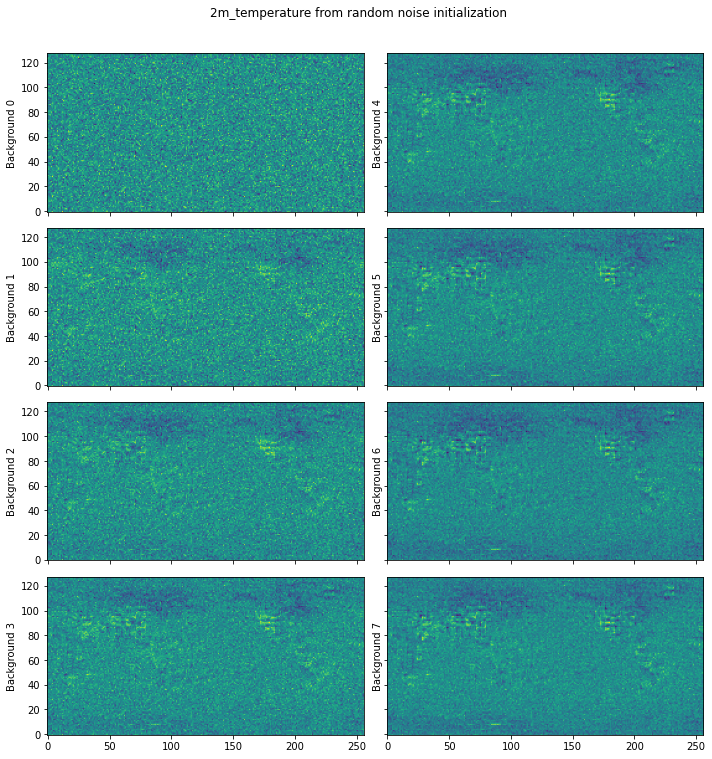

In [6]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import *
import glob

start_date = datetime(2014, 1, 1, hour=0)


plot_date = start_date + timedelta(hours = int(0 * 12))
title_str = f'2m_temperature on {plot_date.strftime("%m/%d/%Y, %H")}'
print(title_str)
#fig, axs = plt.subplots(4, 2, sharex = True, sharey = True, figsize=(7,8))
fig, axs = plt.subplots(4, 2, sharex = True, sharey = True, figsize=(10,10))
#files = glob.glob('../data/var3d_randBackground/background_*_*.npy')
#files = glob.glob('../data/rand_4D_ObsLoader_ds360_2/background_*_*.npy')
files = glob.glob('../data/randBG_var3d_defVars/background_*_*.npy')
files.sort()
print('files :',files)
for itr,file in enumerate(files):
    if itr >= 8:
        continue
    #obs_latlon = obs.obs_latlon[itr][var_idx, :obs.n_obs[itr][var_idx]].detach().cpu().numpy()
    #obs_lat_plot = obs_latlon[:, 0]
    #obs_lon_plot = (obs_latlon[:, 1] + 360) % 360

    file = glob.glob('../data/randBG_var3d_defVars/background_{}_*.npy'.format(itr))[0]
    print('file :',file)
    background = np.load(file)
    print('background.shape :',background.shape)
    #axs[itr,0].imshow(background[0,:,:])
    axs[itr%4,itr//4].imshow(background[0,0,:,:],origin='lower')

    axs[itr%4,itr//4].set_ylabel('Background {}'.format(itr),)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.tight_layout()
fig.suptitle('2m_temperature from random noise initialization',y=1.05)

plt.savefig(os.path.join('plots/', '2m_temperature_randomBackground.png'), dpi = 200,
            bbox_inches = 'tight')

vmax.shape : ()
2m_temperature old vs new obs


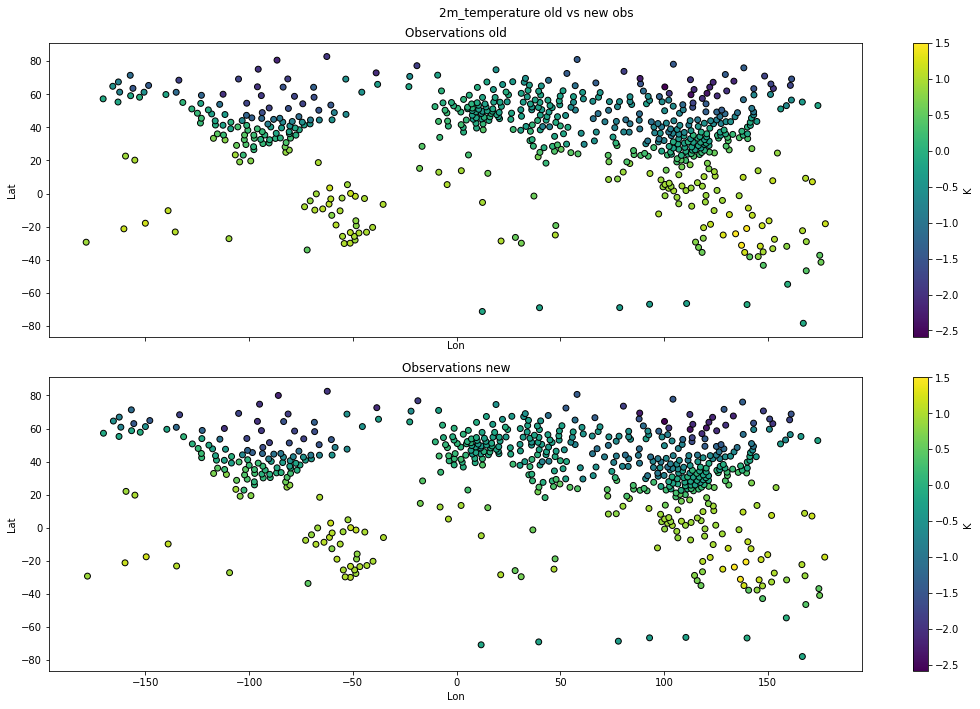

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import h5py

obs_old_pth = "/eagle/MDClimSim/awikner/irga_1415_test1_obs.hdf5" # Observations
#obs_new_pth = "/eagle/MDClimSim/troyarcomano/ml4dvar_climax_v2/igra_141520_stormer_obs_standardized.hdf5"
obs_new_pth = "/eagle/MDClimSim/mjp5595/ml4dvar/igra_141520_stormer_obs_standardized.hdf5"

obs_old = h5py.File(obs_old_pth)
obs_new = h5py.File(obs_new_pth)

obs_old_data = obs_old['2014']['01']['01']['00']['2m_temperature'][:]
obs_new_data = obs_new['2014']['01']['01']['00']['2m_temperature'][:]
#obs_old_data = obs_old['2014']['01']['01']['00']['temperature_250'][:]
#obs_new_data = obs_new['2014']['01']['01']['00']['temperature_250'][:]
#obs_old_data = obs_old['2014']['01']['01']['00']['mean_sea_level_pressure'][:]
#obs_new_data = obs_new['2014']['01']['01']['00']['mean_sea_level_pressure'][:]
#obs_old_data = obs_old['2014']['01']['01']['00']['geopotential_500'][:]
#obs_new_data = obs_new['2014']['01']['01']['00']['geopotential_500'][:]
#print('obs_old_data :',obs_old_data.keys())

#obs_new_data[:,2] = (obs_new_data[:,2] + 273.15 - 278.46) / 21.21

vmin = min(np.min(obs_old_data[:,2]),np.min(obs_new_data[:,2]))
vmax = max(np.max(obs_old_data[:,2]),np.max(obs_new_data[:,2]))
print('vmax.shape :',vmax.shape)

title_str = '2m_temperature old vs new obs'
print(title_str)
fig, axs = plt.subplots(2, 1, sharex = True, sharey = True, figsize = (15,10))

sp_obs = axs[0].scatter(obs_old_data[:,1], obs_old_data[:,0],
                            c = obs_old_data[:,2],
                            vmin=vmin, vmax=vmax, cmap='viridis',
                            edgecolor = 'k', s= 35)

#lon = obs_new_data[:,1]
#lon = np.where(lon > 180, lon-360,lon)
#sp_obs = axs[1].scatter(obs_new_data[:,0], lon,
#sp_obs = axs[1].scatter(lon, obs_new_data[:,0],
sp_obs = axs[1].scatter(obs_new_data[:,1], obs_new_data[:,0],
                            c = obs_new_data[:,2],
                            vmin=vmin, vmax=vmax, cmap='viridis',
                            edgecolor = 'k', s= 35)


plt.colorbar(sp_obs, ax = axs[0], label='K')
axs[0].set_title('Observations old')
plt.colorbar(sp_obs, ax = axs[1], label='K')
axs[1].set_title('Observations new')

axs[0].set_ylabel('Lat')
axs[1].set_ylabel('Lat')
axs[0].set_xlabel('Lon')
axs[1].set_xlabel('Lon')

fig.suptitle(title_str)

plt.tight_layout()

plt.savefig(os.path.join('plots', 'old_vs_new_obs.png'), dpi = 400,
        bbox_inches = 'tight')
plt.show()


In [16]:
print('min/max old_obs_data :',np.min(obs_old_data[:,2]),np.max(obs_old_data[:,2]))
print('min/max new_obs_data :',np.min(obs_new_data[:,2]),np.max(obs_new_data[:,2]))

min/max old_obs_data : -2.5772994739628716 1.4997389322457093
min/max new_obs_data : -2.5862019583703333 1.5012732172549814


In [17]:
obs_new['2014']['01']['01']['00'].keys()

<KeysViewHDF5 ['10m_u_component_of_wind', '10m_u_component_of_wind_H', '10m_v_component_of_wind', '10m_v_component_of_wind_H', '2m_temperature', '2m_temperature_H', 'geopotential_100', 'geopotential_1000', 'geopotential_1000_H', 'geopotential_100_H', 'geopotential_150', 'geopotential_150_H', 'geopotential_200', 'geopotential_200_H', 'geopotential_250', 'geopotential_250_H', 'geopotential_300', 'geopotential_300_H', 'geopotential_400', 'geopotential_400_H', 'geopotential_50', 'geopotential_500', 'geopotential_500_H', 'geopotential_50_H', 'geopotential_600', 'geopotential_600_H', 'geopotential_700', 'geopotential_700_H', 'geopotential_850', 'geopotential_850_H', 'geopotential_925', 'geopotential_925_H', 'mean_sea_level_pressure', 'mean_sea_level_pressure_H', 'specific_humidity_100', 'specific_humidity_1000', 'specific_humidity_1000_H', 'specific_humidity_100_H', 'specific_humidity_150', 'specific_humidity_150_H', 'specific_humidity_200', 'specific_humidity_200_H', 'specific_humidity_250'

In [19]:
obs_old['2014']['01']['01']['00'].keys()

<KeysViewHDF5 ['10m_u_component_of_wind', '10m_u_component_of_wind_H', '10m_v_component_of_wind', '10m_v_component_of_wind_H', '2m_temperature', '2m_temperature_H', 'geopotential_500', 'geopotential_500_H', 'geopotential_700', 'geopotential_700_H', 'geopotential_850', 'geopotential_850_H', 'geopotential_925', 'geopotential_925_H', 'specific_humidity_250', 'specific_humidity_250_H', 'specific_humidity_500', 'specific_humidity_500_H', 'specific_humidity_700', 'specific_humidity_700_H', 'specific_humidity_850', 'specific_humidity_850_H', 'specific_humidity_925', 'specific_humidity_925_H', 'temperature_250', 'temperature_250_H', 'temperature_500', 'temperature_500_H', 'temperature_700', 'temperature_700_H', 'temperature_850', 'temperature_850_H', 'temperature_925', 'temperature_925_H', 'u_component_of_wind_250', 'u_component_of_wind_250_H', 'u_component_of_wind_500', 'u_component_of_wind_500_H', 'u_component_of_wind_700', 'u_component_of_wind_700_H', 'u_component_of_wind_850', 'u_component

2m_temperature_H old vs new obs


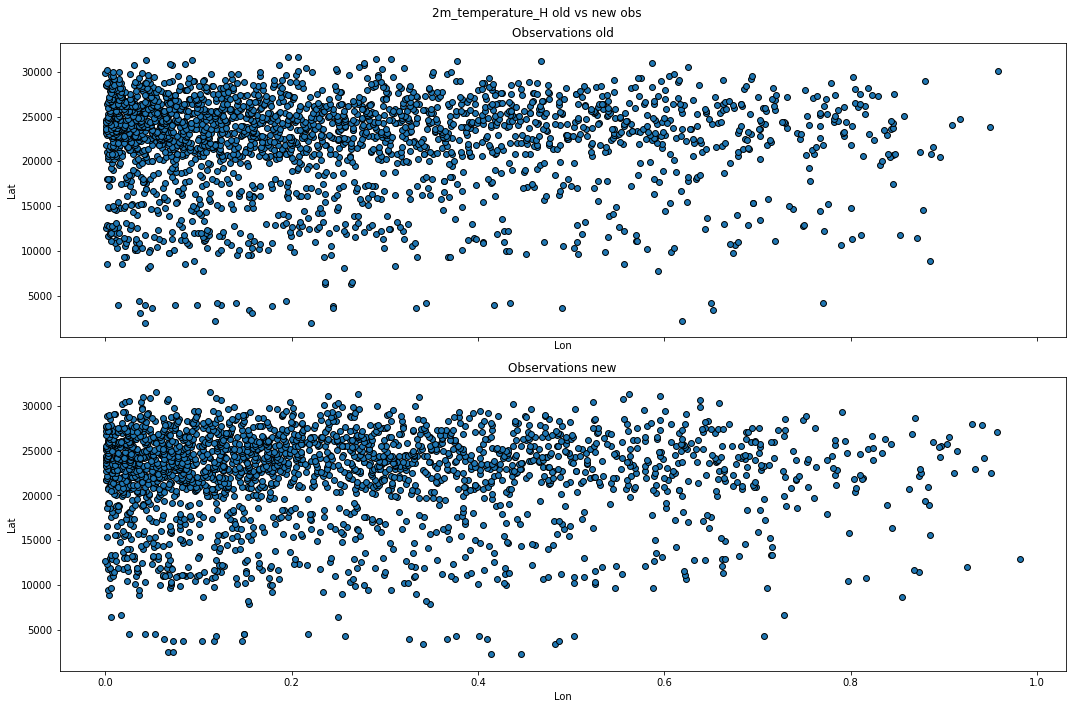

In [27]:
#obs_old_data = obs_old['2014']['01']['01']['00']['2m_temperature_H'][:]
#obs_new_data = obs_new['2014']['01']['01']['00']['2m_temperature_H'][:]
obs_old_data = obs_old['2014']['01']['01']['00']['temperature_500_H'][:]
obs_new_data = obs_new['2014']['01']['01']['00']['temperature_500_H'][:]

title_str = '2m_temperature_H old vs new obs'
print(title_str)
fig, axs = plt.subplots(2, 1, sharex = True, sharey = True, figsize = (15,10))

sp_obs = axs[0].scatter(obs_old_data[:,1], obs_old_data[:,0],
                            edgecolor = 'k', s= 35)

sp_obs = axs[1].scatter(obs_new_data[:,1], obs_new_data[:,0],
                            edgecolor = 'k', s= 35)


axs[0].set_title('Observations old')
axs[1].set_title('Observations new')

axs[0].set_ylabel('Lat')
axs[1].set_ylabel('Lat')
axs[0].set_xlabel('Lon')
axs[1].set_xlabel('Lon')

fig.suptitle(title_str)

plt.tight_layout()

plt.savefig(os.path.join('plots', 'old_vs_new_obs_H.png'), dpi = 400,
        bbox_inches = 'tight')
plt.show()

In [14]:
obs_ = obs_old['2014']['01']['01']['00']['mean_sea_level_pressure'][:]
obs_new_data = obs_new['2014']['01']['01']['00']['mean_sea_level_pressure'][:]

KeyError: "Unable to open object (object 'mean_sea_level_pressure' doesn't exist)"

In [6]:
np.load('/eagle/MDClimSim/troyarcomano/1.40625deg_npz_40shards/lon.npy')

array([  0.     ,   1.40625,   2.8125 ,   4.21875,   5.625  ,   7.03125,
         8.4375 ,   9.84375,  11.25   ,  12.65625,  14.0625 ,  15.46875,
        16.875  ,  18.28125,  19.6875 ,  21.09375,  22.5    ,  23.90625,
        25.3125 ,  26.71875,  28.125  ,  29.53125,  30.9375 ,  32.34375,
        33.75   ,  35.15625,  36.5625 ,  37.96875,  39.375  ,  40.78125,
        42.1875 ,  43.59375,  45.     ,  46.40625,  47.8125 ,  49.21875,
        50.625  ,  52.03125,  53.4375 ,  54.84375,  56.25   ,  57.65625,
        59.0625 ,  60.46875,  61.875  ,  63.28125,  64.6875 ,  66.09375,
        67.5    ,  68.90625,  70.3125 ,  71.71875,  73.125  ,  74.53125,
        75.9375 ,  77.34375,  78.75   ,  80.15625,  81.5625 ,  82.96875,
        84.375  ,  85.78125,  87.1875 ,  88.59375,  90.     ,  91.40625,
        92.8125 ,  94.21875,  95.625  ,  97.03125,  98.4375 ,  99.84375,
       101.25   , 102.65625, 104.0625 , 105.46875, 106.875  , 108.28125,
       109.6875 , 111.09375, 112.5    , 113.90625, 

In [60]:
old_data_lat_min = min(obs_old_data[:,0])
old_data_lat_max = max(obs_old_data[:,0])
old_data_lon_min = min(obs_old_data[:,1])
old_data_lon_max = max(obs_old_data[:,1])
old_data_val_min = min(obs_old_data[:,2])
old_data_val_max = max(obs_old_data[:,2])
new_data_lat_min = min(obs_new_data[:,0])
new_data_lat_max = max(obs_new_data[:,0])
new_data_lon_min = min(obs_new_data[:,1])
new_data_lon_max = max(obs_new_data[:,1])
new_data_val_min = min(obs_new_data[:,2])
new_data_val_max = max(obs_new_data[:,2])
print('old_data_lat_min :',old_data_lat_min) 
print('old_data_lat_max :',old_data_lat_max) 
print('old_data_lon_min :',old_data_lon_min) 
print('old_data_lon_max :',old_data_lon_max) 
print('old_data_val_min :',old_data_val_min) 
print('old_data_val_max :',old_data_val_max) 
print('new_data_lat_min :',new_data_lat_min) 
print('new_data_lat_max :',new_data_lat_max) 
print('new_data_lon_min :',new_data_lon_min) 
print('new_data_lon_max :',new_data_lon_max) 
print('new_data_val_min :',new_data_val_min) 
print('new_data_val_max :',new_data_val_max) 

old_data_lat_min : -78.41666666666667
old_data_lat_max : 82.83333333333333
old_data_lon_min : -178.55805555555554
old_data_lon_max : 177.75
old_data_val_min : -2.5772994739628716
old_data_val_max : 1.4997389322457093
new_data_lat_min : -77.85
new_data_lat_max : 82.5
new_data_lon_min : 0.31689999999997553
new_data_lon_max : 359.3086
new_data_val_min : -2.4562240969314004
new_data_val_max : 4.590788707120374
